<a href="https://colab.research.google.com/github/tjweir/hackfromhome2021-wsid/blob/main/Analyze_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering + Modeling 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_excel("FinalData_20000.xlsx")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['House', 'latitude', 'longitude', 'energy_type', 'heating_type',
       'glazing_types', 'vehicle_type', 'domicile_type', 'season',
       'temperature', 'Temp_cat', 'house_size', 'num_occupants', 'year_built',
       'insulation', 'SmartHouse', 'EPC_rating', 'num_appliances',
       'energy_usage_pm'],
      dtype='object')

In [ ]:
df.drop(['temperature'], axis=1, inplace = True)

In [ ]:
#df.to_excel("/content/drive/MyDrive/Hackathon/FinalData_3.xlsx", index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   House            40000 non-null  int64  
 1   latitude         40000 non-null  float64
 2   longitude        40000 non-null  float64
 3   energy_type      40000 non-null  object 
 4   heating_type     40000 non-null  object 
 5   glazing_types    40000 non-null  object 
 6   vehicle_type     40000 non-null  object 
 7   domicile_type    40000 non-null  object 
 8   season           40000 non-null  object 
 9   Temp_cat         40000 non-null  object 
 10  house_size       40000 non-null  object 
 11  num_occupants    40000 non-null  int64  
 12  year_built       40000 non-null  int64  
 13  insulation       40000 non-null  object 
 14  SmartHouse       40000 non-null  object 
 15  EPC_rating       40000 non-null  object 
 16  num_appliances   40000 non-null  int64  
 17  energy_usage

In [ ]:
df.columns

Index(['House', 'latitude', 'longitude', 'energy_type', 'heating_type',
       'glazing_types', 'vehicle_type', 'domicile_type', 'season', 'Temp_cat',
       'house_size', 'num_occupants', 'year_built', 'insulation', 'SmartHouse',
       'EPC_rating', 'num_appliances', 'energy_usage_pm'],
      dtype='object')

In [ ]:
!pip install lazypredict

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached xgboost-1.1.1-py3-none-win_amd64.whl (54.4 MB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached tqdm-4.56.0-py2.py3-none-any.whl (72 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.1
    Uninstalling xgboost-1.4.1:
      Successfully uninstalled xgboost-1.4.1
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


# Feature engineering

In [ ]:
#Encoding
dummy_df = pd.get_dummies(df)

In [ ]:
dummy_df

,House,latitude,longitude,num_occupants,year_built,num_appliances,energy_usage_pm,energy_type_grid,energy_type_solar,heating_type_electric,...,insulation_Medium,SmartHouse_Full,SmartHouse_Semi,EPC_rating_A,EPC_rating_B,EPC_rating_C,EPC_rating_D,EPC_rating_E,EPC_rating_F,EPC_rating_G
0,0,50.123504,-6.616434,5,1970,20,737.209626,0,1,1,...,1,0,1,0,0,1,0,0,0,0
1,1,56.708603,-0.457610,3,1995,32,909.524100,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,2,59.486333,-0.625680,3,1967,48,957.015634,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3,3,55.997358,-0.498099,4,1988,38,1838.451339,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,4,56.043025,-4.002039,4,1970,37,1101.326663,0,1,1,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,19995,50.232064,-0.041656,5,1933,32,1662.740557,0,1,1,...,1,0,1,0,0,0,1,0,0,0
39996,19996,54.620908,0.682945,1,1960,42,1514.412651,0,1,1,...,1,1,0,0,0,0,0,1,0,0
39997,19997,52.016146,-1.274549,5,1967,27,1328.893336,0,1,1,...,1,0,1,0,0,1,0,0,0,0
39998,19998,53.741860,-2.846520,3,1963,11,1364.354161,0,1,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
dummy_df.columns

Index(['House', 'latitude', 'longitude', 'num_occupants', 'year_built',
       'num_appliances', 'energy_usage_pm', 'energy_type_grid',
       'energy_type_solar', 'heating_type_electric', 'heating_type_heat pump',
       'heating_type_natural gas', 'glazing_types_double',
       'glazing_types_single', 'glazing_types_triple', 'vehicle_type_electric',
       'vehicle_type_general', 'domicile_type_detached',
       'domicile_type_semi detached', 'domicile_type_terraced',
       'season_Summer', 'season_Winter', 'Temp_cat_High', 'Temp_cat_Low',
       'Temp_cat_Medium', 'house_size_Large', 'house_size_Medium',
       'house_size_Small', 'insulation_High', 'insulation_Low',
       'insulation_Medium', 'SmartHouse_Full', 'SmartHouse_Semi',
       'EPC_rating_A', 'EPC_rating_B', 'EPC_rating_C', 'EPC_rating_D',
       'EPC_rating_E', 'EPC_rating_F', 'EPC_rating_G'],
      dtype='object')

In [ ]:
#!pip install lazypredict

# Modeling using AutoML

In [ ]:
#Pasted from code block
dt_p = dummy_df
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Load dataset
#data = dt_p

X = dummy_df.drop('energy_usage_pm', axis=1)
y = dummy_df['energy_usage_pm']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = reg.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

C:\Users\Divit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 21061.78it/s]

tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.35
ExtraTreeRegressor,1.00,1.00,0.00,0.23
ExtraTreesRegressor,1.00,1.00,0.00,13.11
GaussianProcessRegressor,1.00,1.00,0.00,349.84
RandomForestRegressor,0.96,0.96,96.31,16.54
BaggingRegressor,0.94,0.94,112.85,1.79
XGBRegressor,0.80,0.80,208.58,1.52
KNeighborsRegressor,0.78,0.78,220.04,76.47
LGBMRegressor,0.76,0.76,229.38,0.41


In [ ]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

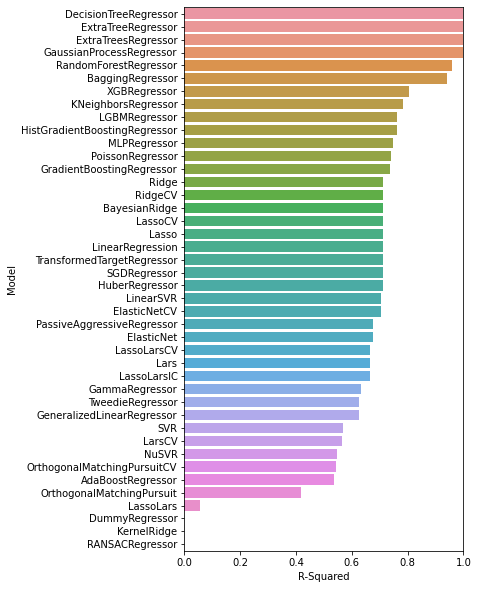

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models_train["R-Squared"] = [0 if i < 0 else i for i in models_train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=models_train.index, x="R-Squared", data=models_train)
ax.set(xlim=(0, 1))

In [ ]:
X = dummy_df.drop('energy_usage_pm', axis=1)
y = dummy_df['energy_usage_pm']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (40000, 39)
Shape of y =  (40000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (32000, 39)
Shape of y_train =  (32000,)
Shape of X_test =  (8000, 39)
Shape of y_test =  (8000,)


## 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, criterion='mse')
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
regressor.score(X_test, y_test)

0.7044140722777041

In [ ]:
regressor_100 = RandomForestRegressor(n_estimators=500, criterion='mse')
regressor_100.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
regressor_100.score(X_test, y_test)

0.7041403146623133

In [ ]:
X_test.iloc[-1, :]

House                         13968.00
latitude                         51.89
longitude                        -4.09
num_occupants                     1.00
year_built                     1999.00
num_appliances                   12.00
energy_type_grid                  1.00
energy_type_solar                 0.00
heating_type_electric             0.00
heating_type_heat pump            0.00
heating_type_natural gas          1.00
glazing_types_double              0.00
glazing_types_single              0.00
glazing_types_triple              1.00
vehicle_type_electric             1.00
vehicle_type_general              0.00
domicile_type_detached            0.00
domicile_type_semi detached       0.00
domicile_type_terraced            1.00
season_Summer                     1.00
season_Winter                     0.00
Temp_cat_High                     0.00
Temp_cat_Low                      1.00
Temp_cat_Medium                   0.00
house_size_Large                  0.00
house_size_Medium        

In [ ]:
regressor.predict([X_test.iloc[-1, :]])

array([643.66728809])

In [ ]:
y_test.iloc[-1]

502.4651618490087

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1614.36466456, 1829.73107129, 1488.55510779, ..., 1111.07695861,
       1225.32813416,  643.66728809])

In [ ]:
y_test

31438   1388.28
35203   2200.24
20169   1398.17
28598   1745.09
25565   1640.83
          ...  
30847   1714.31
2069    1216.09
8970    1571.87
39114    919.79
13968    502.47
Name: energy_usage_pm, Length: 8000, dtype: float64

### Refreshed the dataframe and tried a different model

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (32000, 39)
Shape of y_train =  (32000,)
Shape of X_test =  (8000, 39)
Shape of y_test =  (8000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## 2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-1.40751162e+00,  8.64004104e-01, -2.10295463e+00,  1.71952857e+00,
        3.95403859e-01,  2.73305084e+00,  3.67363566e+14,  3.67363566e+14,
        1.67641936e+15,  1.33587838e+15,  1.32225872e+15, -3.77957189e+14,
       -1.26287902e+15,  1.91220312e+15,  1.84343306e+15,  1.84343306e+15,
        7.37931447e+14,  7.38544983e+14,  7.34881692e+14,  2.53316102e+14,
        2.53316102e+14, -6.15406142e+14, -9.71940620e+14, -9.70033497e+14,
       -1.51842292e+13, -1.28463734e+14, -1.28018393e+14, -7.29818313e+14,
        1.02868950e+15,  1.57792615e+15,  1.63980983e+12,  1.63980983e+12,
       -1.06944017e+14, -1.06351813e+14, -1.03307993e+14, -1.03667893e+14,
       -1.04165773e+14,  1.00602223e+15,  1.01174861e+15])

In [ ]:
lr.intercept_

1267.8683667402925

In [ ]:
X_test[0, :]

array([ 0.24884348,  0.83362957, -0.28260884,  0.72234677,  1.11393284,
        0.93151891, -1.00878862,  1.00878862,  0.71714094, -0.45577348,
       -0.4487556 ,  1.41746807, -0.70344732, -0.71240018,  0.99426644,
       -0.99426644,  1.40961878, -0.71120425, -0.70071917, -0.9990005 ,
        0.9990005 , -0.35447252,  1.10882779, -0.88612425, -0.05160741,
        0.5839419 , -0.57985213, -0.71240018, -0.70344732,  1.41746807,
       -0.99271404,  0.99271404, -0.45176755, -0.44800158,  2.84763474,
       -0.35273873, -0.35491919, -0.44346849, -0.44724714])

In [ ]:
lr.predict([X_test[0, :]])

array([1604.36836674])

In [ ]:
lr.predict(X_test)

array([1603.54583509, 1846.03632347, 1608.03632347, ..., 1222.67083509,
       1122.17083509,  617.67083509])

In [ ]:
y_test

31438   1388.28
35203   2200.24
20169   1398.17
28598   1745.09
25565   1640.83
          ...  
30847   1714.31
2069    1216.09
8970    1571.87
39114    919.79
13968    502.47
Name: energy_usage_pm, Length: 8000, dtype: float64

In [ ]:
lr.score(X_test, y_test)

0.7095582062162817

In [ ]:
X = dummy_df.drop('energy_usage_pm', axis=1)
y = dummy_df['energy_usage_pm']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (40000, 39)
Shape of y =  (40000,)


### Refreshed the dataframe and tried a different model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (32000, 39)
Shape of y_train =  (32000,)
Shape of X_test =  (8000, 39)
Shape of y_test =  (8000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
 
X_train_poly.shape, X_test_poly.shape
 

((32000, 820), (8000, 820))

In [ ]:
lr = LinearRegression()
 
lr.fit(X_train_poly, y_train)
 
lr.score(X_test_poly, y_test,)

0.7317885812690833